# Graduate Admission Dataset

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [64]:
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Graduate_Admissions.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df = df.drop('Serial No.', axis=1)

In [6]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [9]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Basic Data Visualisation

Text(0.5, 1, 'Correlation between various features')

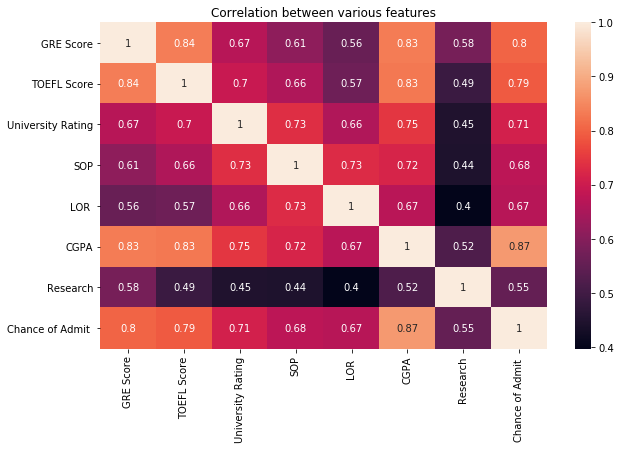

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between various features')

In [22]:
a = df.corr().iloc[-1].sort_values(ascending=False)
a.drop(a.index[0],inplace=True)

Text(0.5, 0, 'Features')

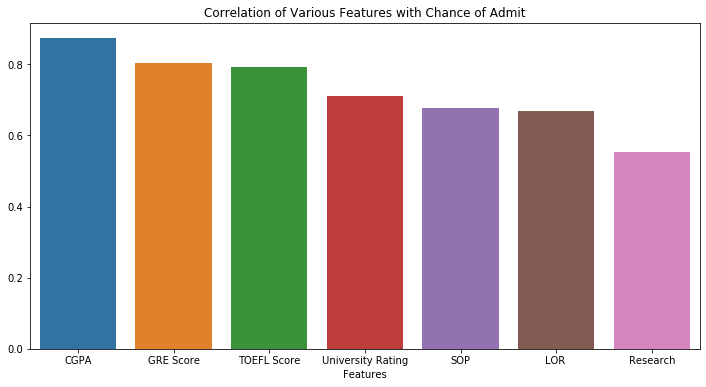

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x=a.index,y=a.values)
plt.title('Correlation of Various Features with Chance of Admit')
plt.xlabel('Features')

### Let's analyse the relation between the various features

Text(0.5, 1.0, 'GRE Score vs TOEFL Score')

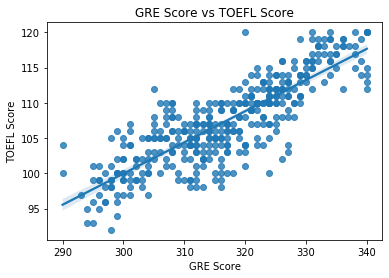

In [46]:
sns.regplot(x='GRE Score', y='TOEFL Score',data=df)
plt.title('GRE Score vs TOEFL Score')

Text(0.5, 1.0, 'GRE Score vs CGPA')

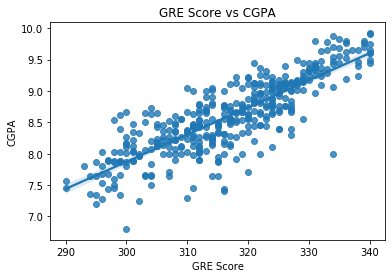

In [47]:
sns.regplot(x='GRE Score',y='CGPA',data=df)
plt.title('GRE Score vs CGPA')

Text(0.5, 1, 'CGPA vs LOR')

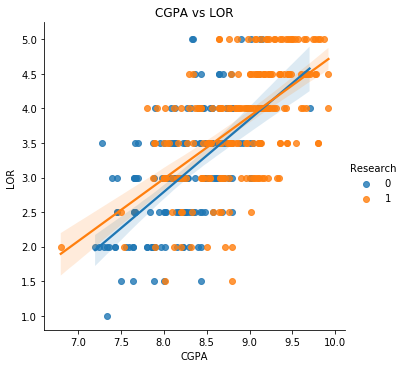

In [54]:
sns.lmplot(x='CGPA',y='LOR ',hue='Research',data=df)
plt.title('CGPA vs LOR')

CGPA and LOR are not that much related. But having Research experience is related with a good LOR. One of the reasons for this maybe that the student works or does his/her research under the professor which may result in a good LOR.

Text(0.5, 1, 'CGPA vs SOP')

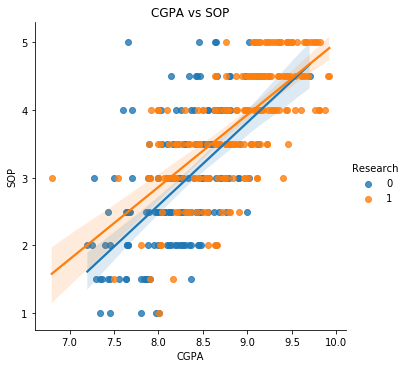

In [58]:
sns.lmplot(x='CGPA',y='SOP',hue='Research',data=df)
plt.title('CGPA vs SOP')

## Building the Model

In [81]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
y_train.count()

280

In [83]:
models = [['Linear Regression ',LinearRegression()],
         ['Decision Tree Regressor ',DecisionTreeRegressor()],
         ['Random Forest Regressor ',RandomForestRegressor()],
         ['Support Vector Regressor ',SVR()]]

for name,model in models:
    model = model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(name, ('RMSE : ',np.sqrt(mean_squared_error(y_test,predictions))))

Linear Regression  ('RMSE : ', 0.06929436991067951)
Decision Tree Regressor  ('RMSE : ', 0.11654040787068949)
Random Forest Regressor  ('RMSE : ', 0.07486206259960158)
Support Vector Regressor  ('RMSE : ', 0.08613813898343307)
